# No Free Lunch Theorem
1. 특성 선택, 훈련 샘플 수집
2. 성능 지표 선택
3. 분류 모델 및 최적화 알고리즘 선택
4. 모델 성능 평가
5. 알고리즘 튜닝

## 아이리스 붓꽃 데이터 가져오기

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


## 훈련 테이터와 검증 데이터 분리 및 계층화

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('y의 레이블 카운트:', np.bincount(y))

y의 레이블 카운트: [50 50 50]


In [4]:
print('y_train의 레이블 카운트:', np.bincount(y_train))

y_train의 레이블 카운트: [35 35 35]


In [5]:
print('y_test의 레이블 카운트:', np.bincount(y_test))

y_test의 레이블 카운트: [15 15 15]


## 특성 표준화

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## 퍼셉트론 - 훈련

In [7]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0 = 0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

## 퍼셉트론 - 결과확인

In [8]:
y_pred = ppn.predict(X_test_std)
print("잘못 분류된 샘플 개수: %d" % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [9]:
from sklearn.metrics import accuracy_score
print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.978


In [10]:
print('정확도: %.3f' % ppn.score(X_test_std, y_test))

정확도: 0.978


## 퍼셉트론 - 시각화

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
    
    # 마커와 컬러맵을 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 산점도
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha=0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], 
                    X_test[:, 1],
                    facecolors = 'none', 
                    edgecolor = 'black',
                    linewidth = 1,
                    marker = 'o',
                    s = 100,
                    label = 'test set')

C:\Users\user\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


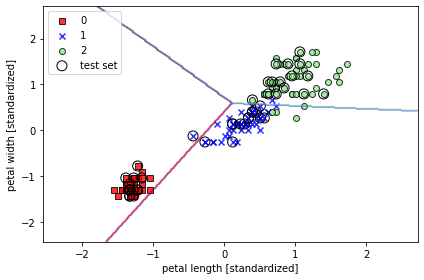

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std,
                      y = y_combined,
                      classifier = ppn,
                      test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# 로지스틱 회귀
 : 클래스 레이블을 예측할 뿐만 아니라, 클래스에 소속될 확률을 예측할 때 유용

## 시그모이드 함수
- z가 양의 무한대에 가까워질수록 $\phi(z)$는 1에 수렴
- z가 음의 무한대에 가까워질수록 $\phi(z)$는 0에 수렴

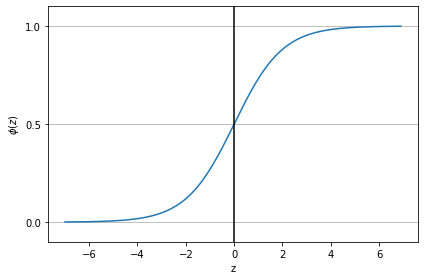

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

## 로지스틱 회귀의 비용함수를 유도
- 정확히 예측할 수록 비용이 0에 가까워지고, 잘못된 예측을 할 수록 더 큰 비용을 부여

In [14]:
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False

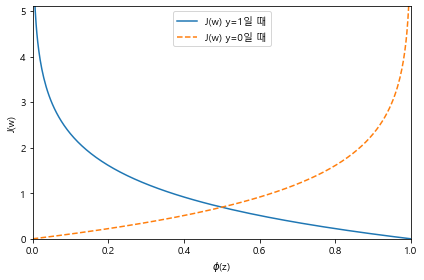

In [15]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label = 'J(w) y=1일 때')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label = 'J(w) y=0일 때')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## 로지스틱 회귀 알고리즘

In [16]:
class LogisticRegressionGD(object):
    """
    경사 하강법을 사용한 로지스틱 회귀 분류기
    
    매개변수
    ------------
    learning_rate : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드
      
    속성
    ------------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값
      
    """
    
    def __init__(self, learning_rate = 0.05, n_iter = 100, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        훈련 데이터 학습
        
        매개변수
        ------------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃 값
          
        반환값
        ------------
        self : object
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, 
                              scale = 0.01, 
                              size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.learning_rate * X.T.dot(errors)
            self.w_[0] += self.learning_rate * errors.sum()
            
            # 제곱 오차합 대신 로지스틱 비용을 계산
            cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        return 1. / (1/ + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # ≒ np.where(self.activation(self.net_input(x)) >= 0.5, 1, 0)

## 구현한 로지스틱 모델 이진 분류 문제에 적용

C:\Users\user\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in log
C:\Users\user\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: No contour levels were found within the data range.
C:\Users\user\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


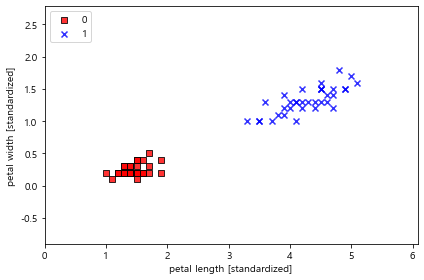

In [17]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(learning_rate = 0.05,
                            n_iter = 1000,
                            random_state = 1)

lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X = X_train_01_subset, 
                      y = y_train_01_subset,
                      classifier = lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# 사이킷런을 사용하여 로지스틱 회귀 모델 훈련

C:\Users\user\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


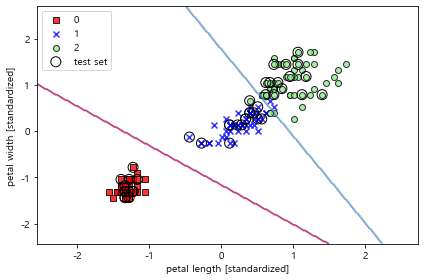

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier = lr,
                      test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## 어떤 클래스에 속할 확률 구하기
- predict : 어떤 클래스에 속할지 예측값을 반환
- predict_proba : 각 클래스에 속할 확률을 반환

In [19]:
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [20]:
# argmax : 가장 높은 확률(최대값)을 가진 클래스(인덱스)를 반환
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [21]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [22]:
# 하나의 행만 입력할 경우 데이터가 1차원이기때문에 reshape 메써드를 통해 2차원 포맷으로 변경
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

## L2 규제 시각화

In [23]:
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'D2Coding'
mpl.rcParams['axes.unicode_minus'] = False

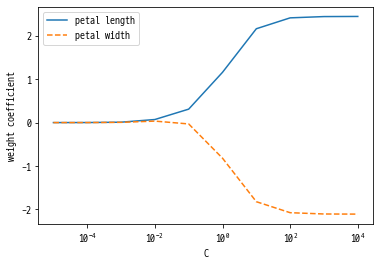

In [24]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)
plt.plot(params, 
         weights[:, 0], 
         label = 'petal length')
plt.plot(params, 
         weights[:, 1], 
         linestyle = '--',
         label = 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

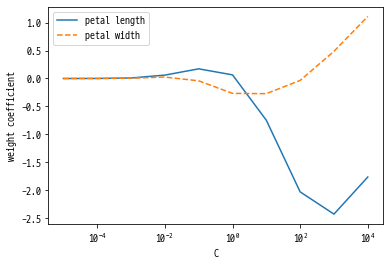

In [25]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='multinomial')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)
plt.plot(params, 
         weights[:, 0], 
         label = 'petal length')
plt.plot(params, 
         weights[:, 1], 
         linestyle = '--',
         label = 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

# 서포트 벡터 머신을 사용한 최대 마진 분류

C:\Users\user\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


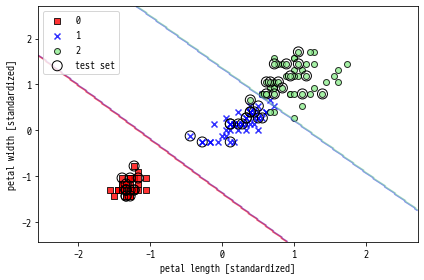

In [26]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier = svm,
                      test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## 서포트 벡터 머신의 확률적 경사 하강법 버전

In [27]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## 커널 SVM을 사용한 비선형 문제 해결

### XOR형태의 데이터셋 생성

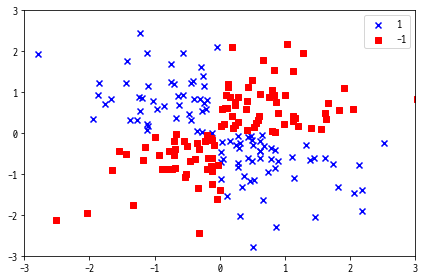

In [28]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c = 'b',
            marker = 'x',
            label = '1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c = 'r',
            marker = 's',
            label = '-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### RBF 커널

C:\Users\user\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


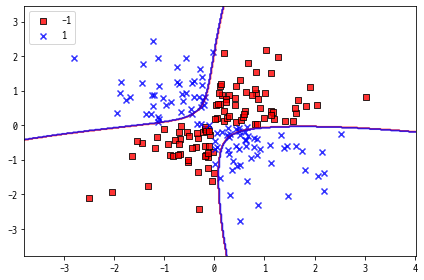

In [29]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.10, C = 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

### 붓꽃 데이터셋에서 RBF 커널 적용

#### 감마($\gamma$)값에 따른 결정 경계 비교

C:\Users\user\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


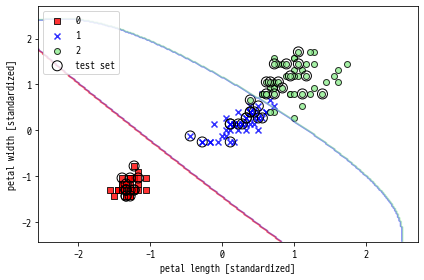

In [30]:
# 감마값을 낮게
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.2, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier = svm,
                      test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

C:\Users\user\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


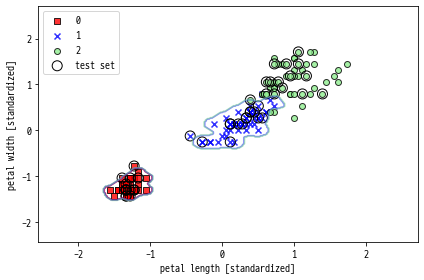

In [31]:
# 감마값을 높게
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 100.0, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier = svm,
                      test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()